## 循环神经网络
### 为什么需要循环神经网络
- 序列式问题
  - 图1a为普通神经网络(Vanilla Neural Network)
  - 图1b为1对多：图片生成描述
  - 图1c为多对1：文本分类（文本情感分析）
  - 图1d为多对多：encoding-decoding，机器翻译
  - 图1e为实时多对多：视频解说

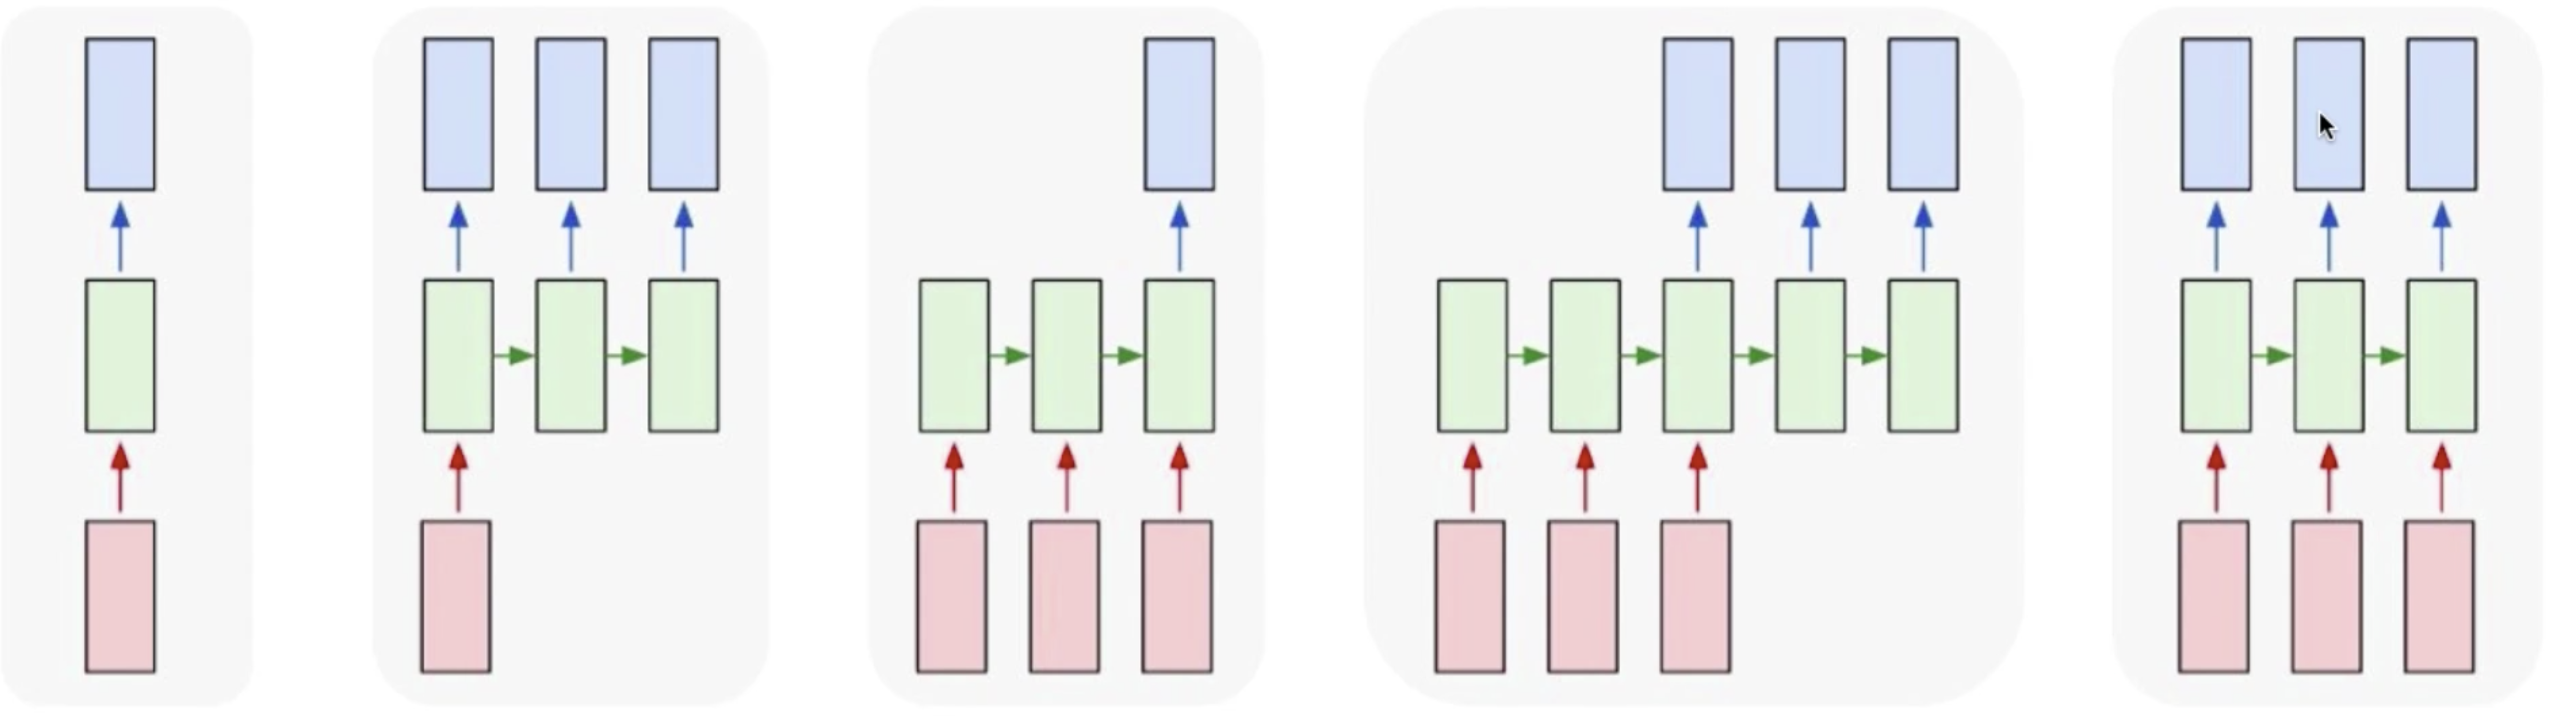

In [1]:
from IPython.display import Image
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/序列式问题.png', width=500, height=500)

&emsp;图1a &emsp;&emsp;&emsp;&emsp;&emsp; 1b &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;1c &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;1d &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&emsp;&emsp;&ensp; 1e

### 循环神经网络结构
#### 最简单的循环神经网络
- 如图2所示
- 维护一个状态作为下一步的额外输入
- 每一步使用相同的激活函数和参数
  - $s_t = f_w(s_{t-1}, x_t)$，其中 $s_i$ 表示RNN维护的那个状态，$s_t$ 为新状态，$s_{t-1}$ 为旧状态，$x_t$ 为第t步的输入
  - $s_t = \mathop{tanh}(W \cdot s_{t-1} + U \cdot x_t)$
  - $\hat{y}_t = \mathop{softmax}(V \cdot s_t)$
- 字符语言模型
  - 给定一个上下文，能够预测下一个词是什么
  - 如图3所示
  - 预测下一字符
  - 词典：[j, e, p]
  - 样本：jeep
  - 测试时，上一步的输出为下一步的输入
  - 缺点为：一旦中间某一步预测错误，就可能导致后面出错
- 正向传播
  - 如图4a所示
  - $E(y, \hat{y}) = \sum_t E(y_t, \hat(y)_t)$
  - 显示的是一个多对多的前向传播
- 反向传播
  - 如图4b所示
$$
\begin{align}
\frac{\partial E}{\partial W} &= \sum_t \frac{\partial E_t}{\partial W}\\
\frac{\partial E_3}{\partial W} &= \frac{\partial E_3}{\partial \hat{y}_3} \frac{\partial \hat{y}_3}{\partial s_3} \frac{\partial s_3}{\partial W}\\
\end{align}
$$
$$
\begin{align}
&\because\ s_3 = \mathop{tanh}(Ux_t+Ws_2)\\
&\therefore\ \frac{\partial E_3}{\partial W} = \sum_{k=0}^{3} \frac{\partial E_3}{\partial \hat{y}_3} \frac{\partial \hat{y}_3}{\partial s_3} \frac{\partial s_3}{\partial s_k} \frac{\partial s_k}{\partial W}\\
&\therefore\ \frac{\partial E_3}{\partial W} = \sum_{k=0}^{3} \frac{\partial E_3}{\partial \hat{y}_3} \frac{\partial \hat{y}_3}{\partial s_3} (\prod_{j=k+1}^3 \frac{\partial s_j}{\partial s_{j-1}}) \frac{\partial s_k}{\partial W}
\end{align}
$$
  - tanh 输出在-1和1之间
  - 容易导致梯度消失：(1)由于激活函数的特性，即取值范围在(-1, 1)之间，当输出值接近-1或1时，出现梯度特别小，这是易出现梯度消失；(2)当序列特别长时(如图5a)，梯度在反向传递的过程中每次都要乘一个-1和1之间特别小的值，容易出现梯度消失
  - 分块计算loss和梯度，忽略掉较远为止传回来的梯度，如图5b
  - 较远的步骤梯度贡献很小
  - 切换其他激活函数后，也可能导致梯度爆炸

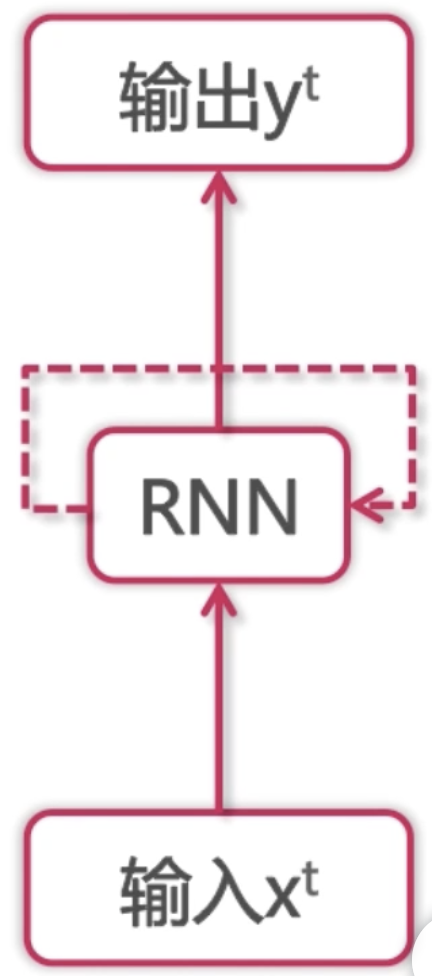

In [14]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/循环神经网络结构.png', width=80, height=80)

&emsp;&emsp;&ensp;图2

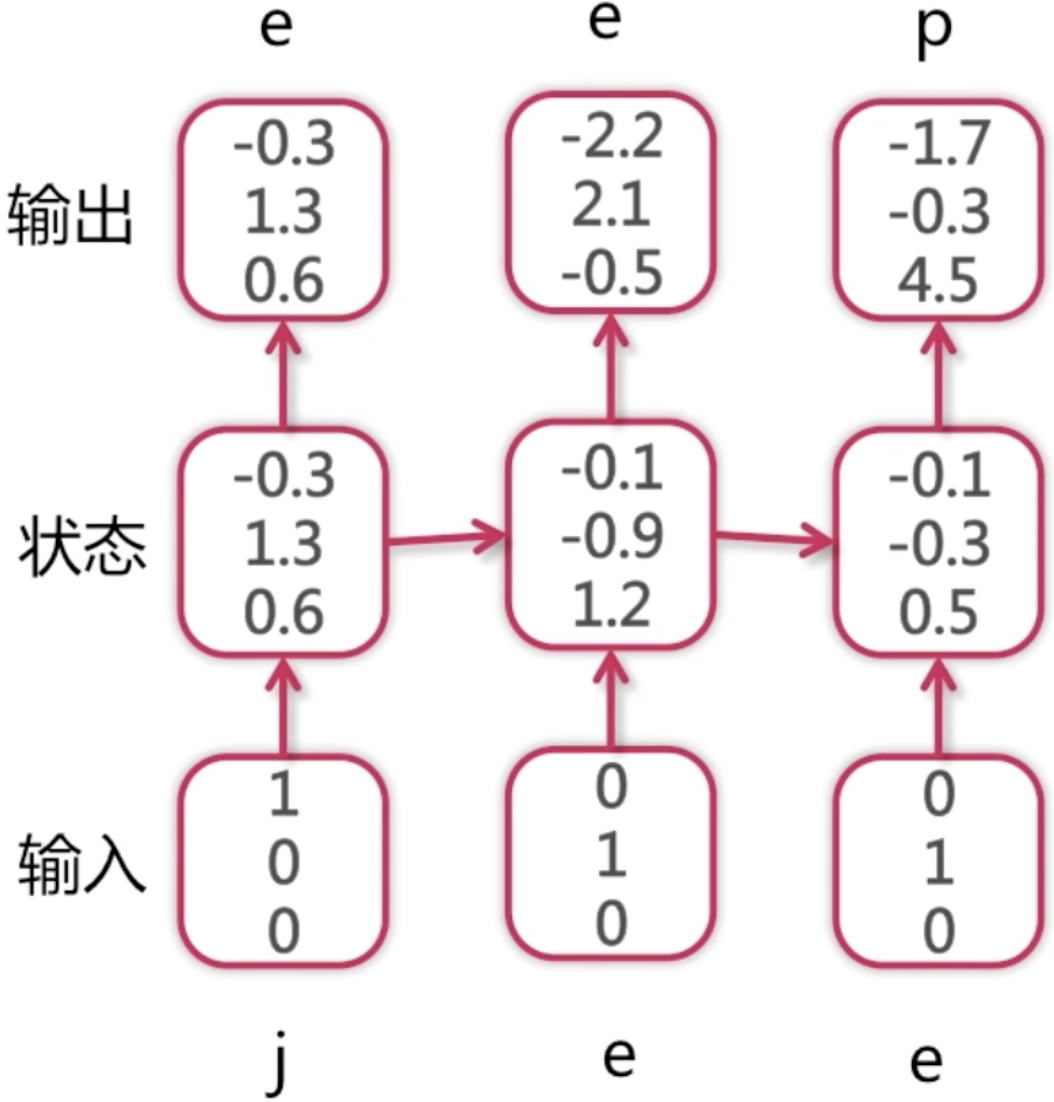

In [13]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/字符语言模型.png', width=200, height=200)

&ensp;图3a 训练时的循环神经网络图

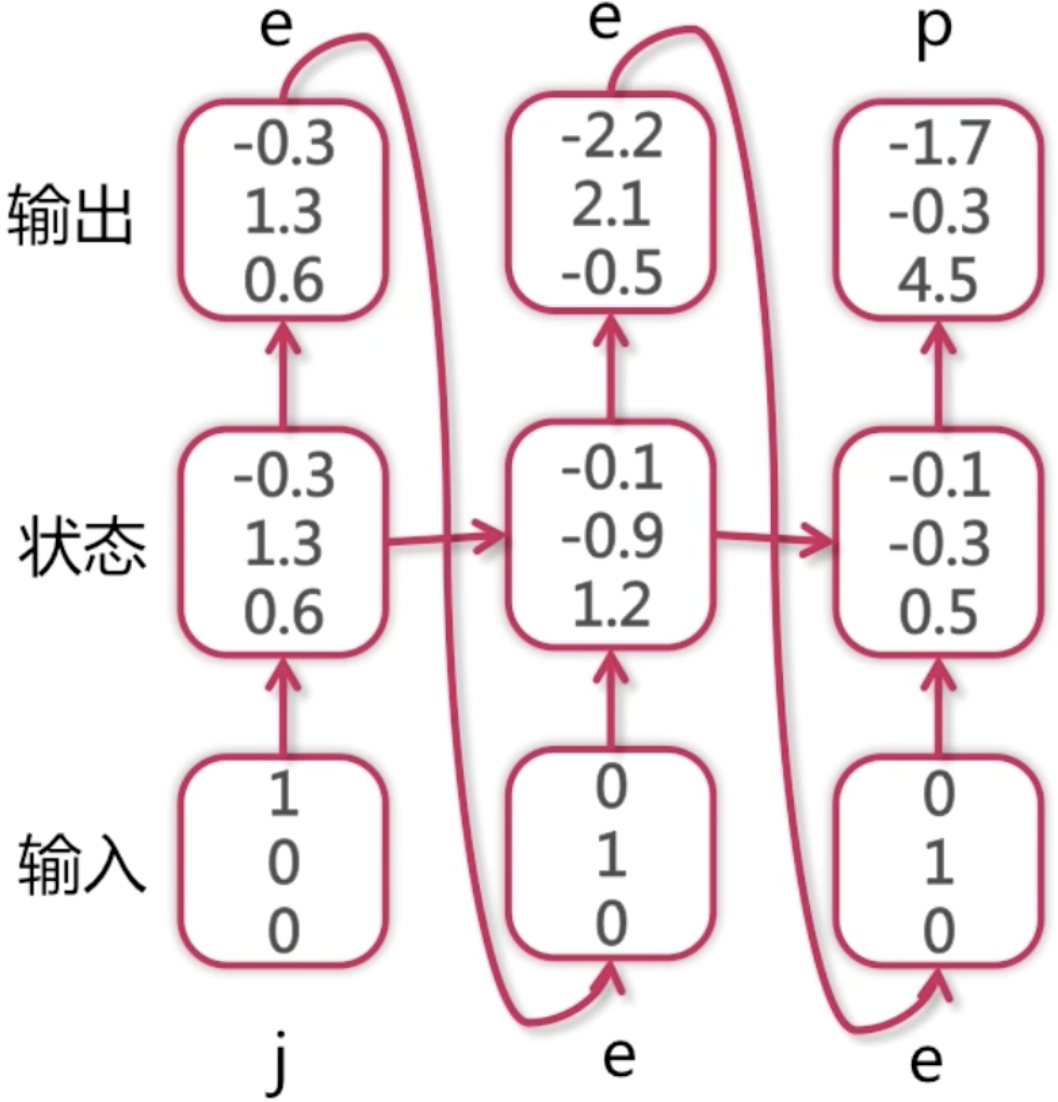

In [11]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/字符语言模型2.png', width=200, height=200)

&ensp;图3b 训练时的循环神经网络图

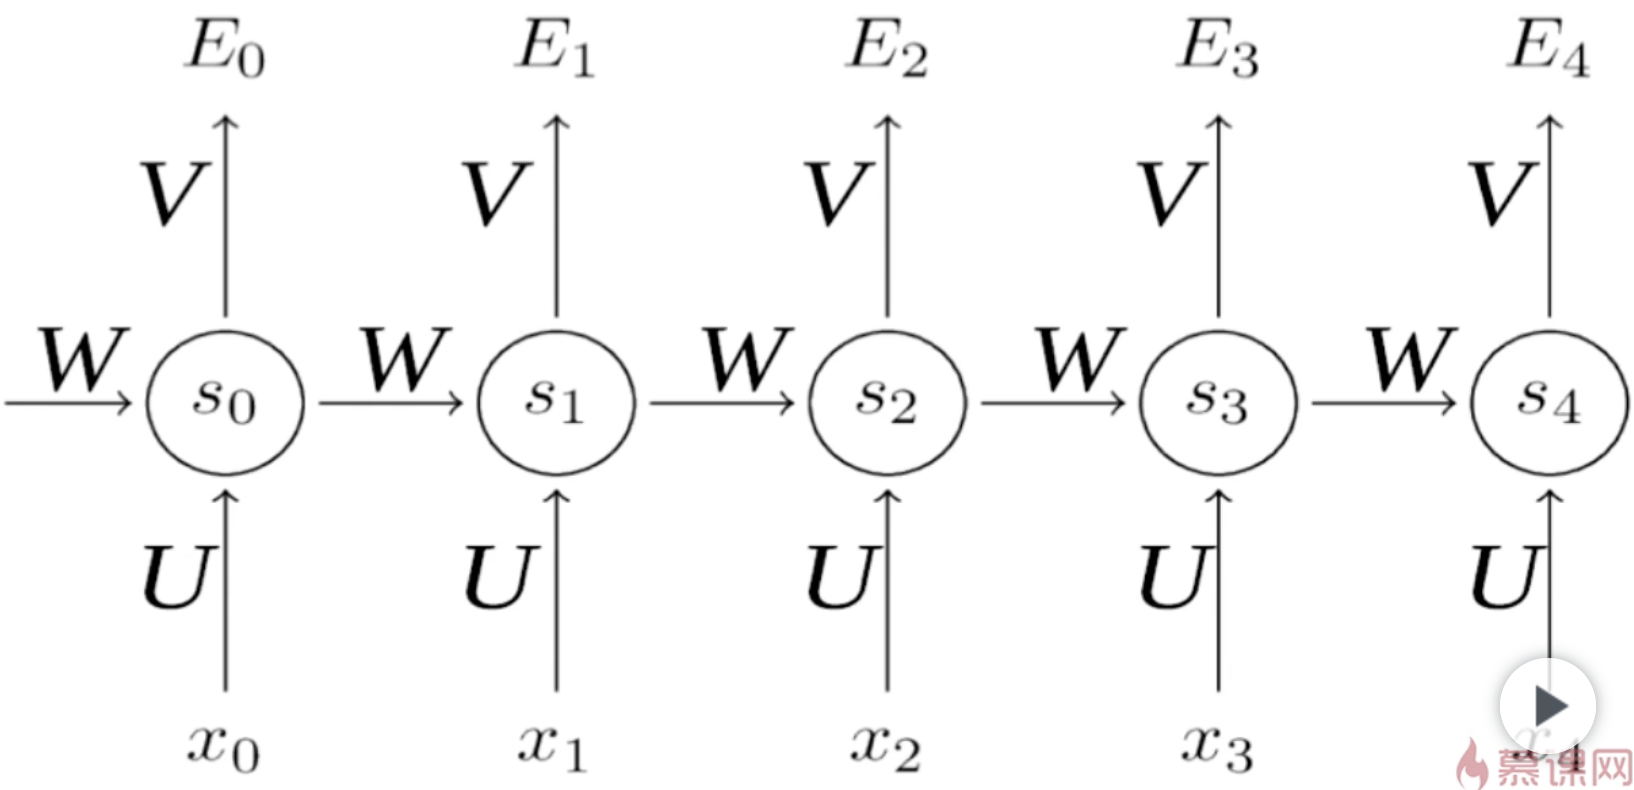

In [16]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/循环神经网络的正向传播.png', width=300, height=300)

&emsp;&emsp;&emsp;&emsp;&emsp;图4a 循环神经络的前向传播图

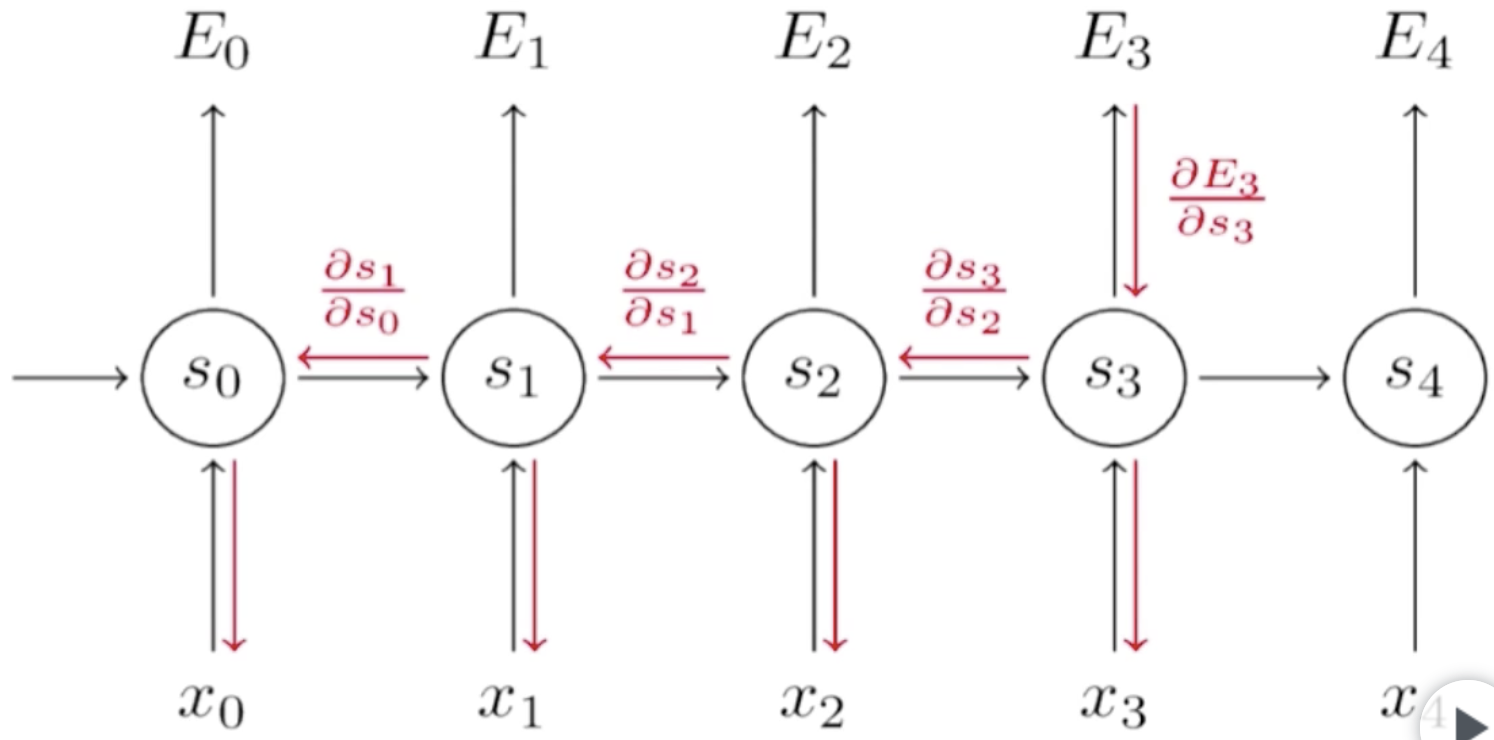

In [17]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/循环神经网络的反向传播.png', width=300, height=300)

&emsp;&emsp;&emsp;&emsp;&emsp;图4b 循环神经络的反向传播图

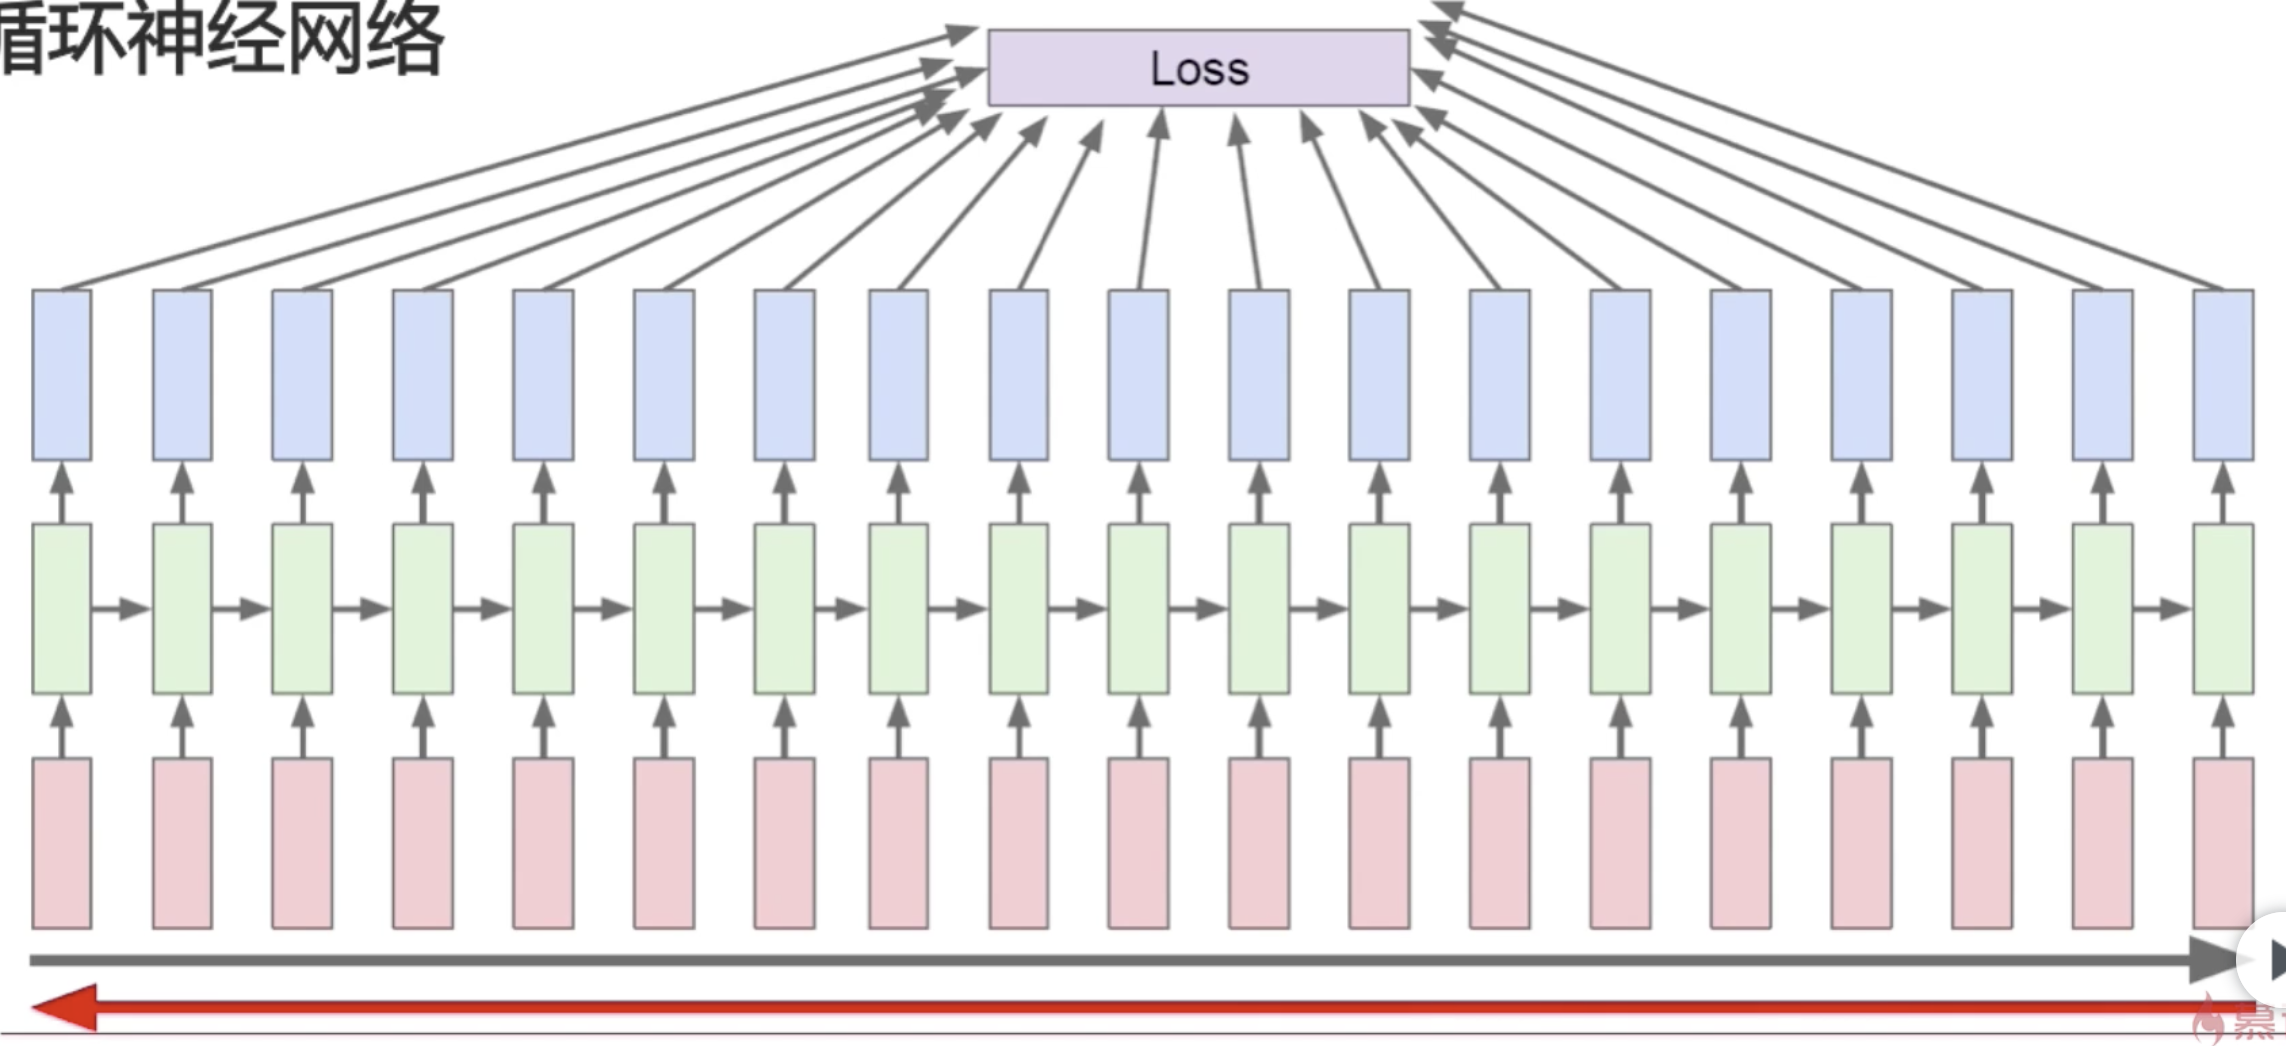

In [19]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/序列较长时的loss图.png', width=350, height=350)

&emsp;&emsp;&emsp;图5a 长序列下循环神经络的前、反向传播图

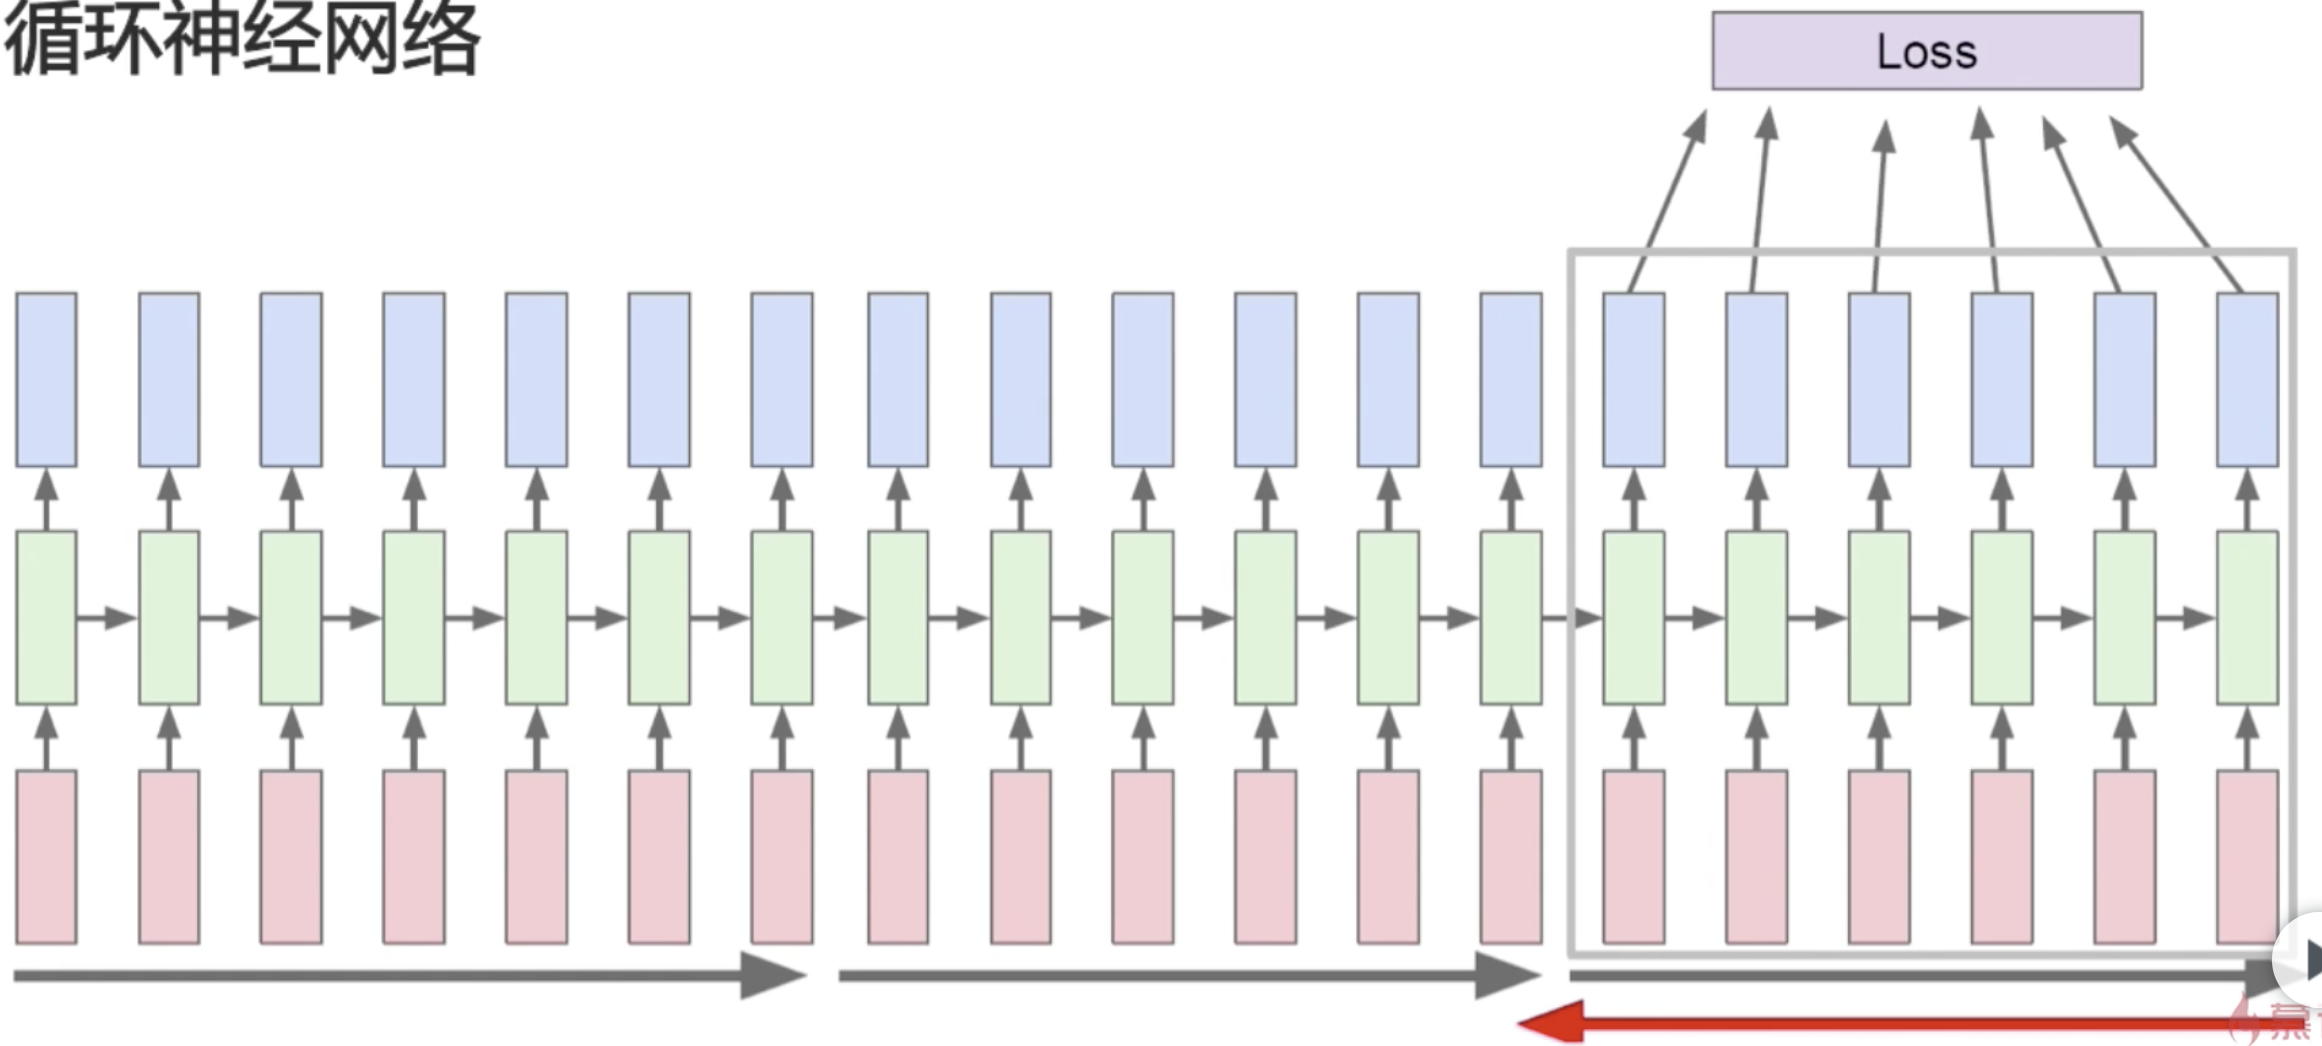

In [21]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/分块计算loss.png', width=350, height=350)

&emsp;&ensp;图5b 长序列下循环神经络损失与梯度的分块计算图

#### 多层循环神经网络
- 如图6
- 低层输出作为高层输入
- 同层之间依旧递归
- 增加网络拟合能力
- 一般隐藏维数逐渐递增
  - 64 - 128 - 256

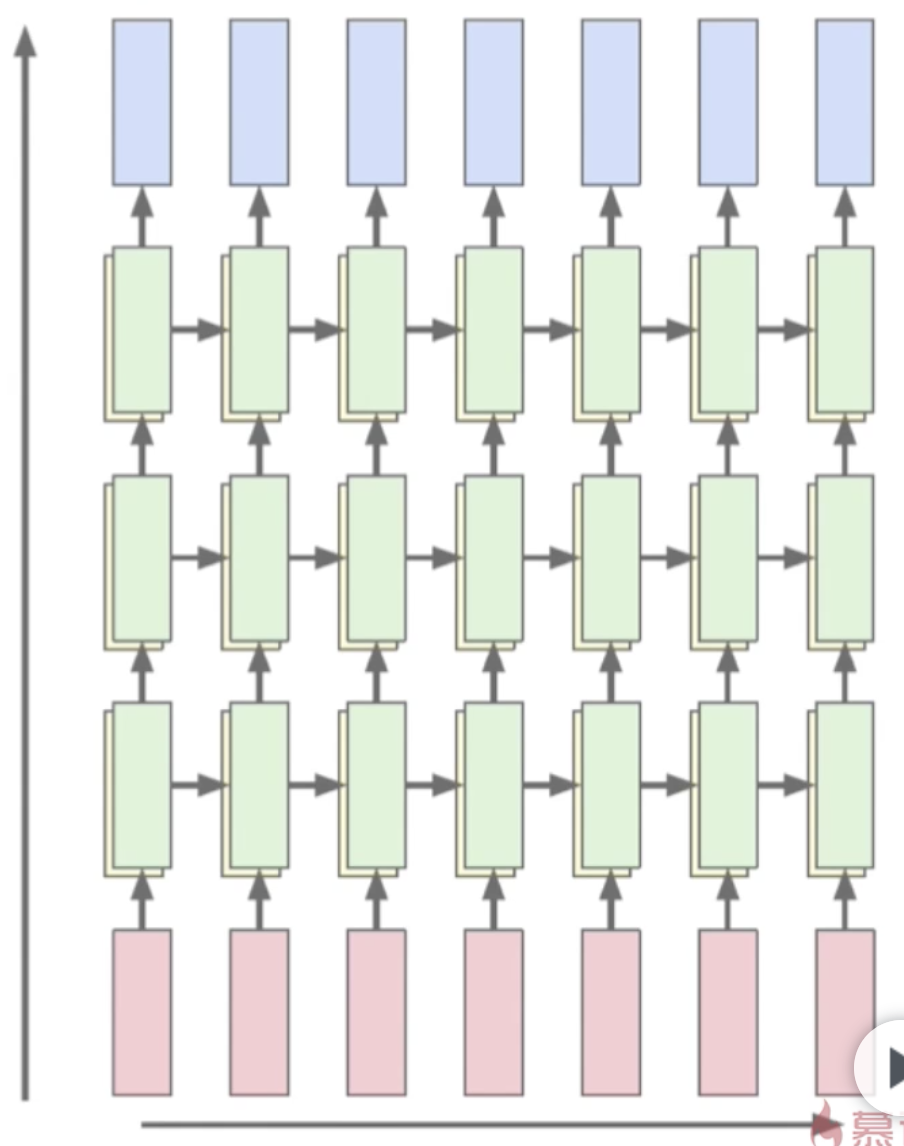

In [23]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/多层循环神经网络.png', width=200, height=200)

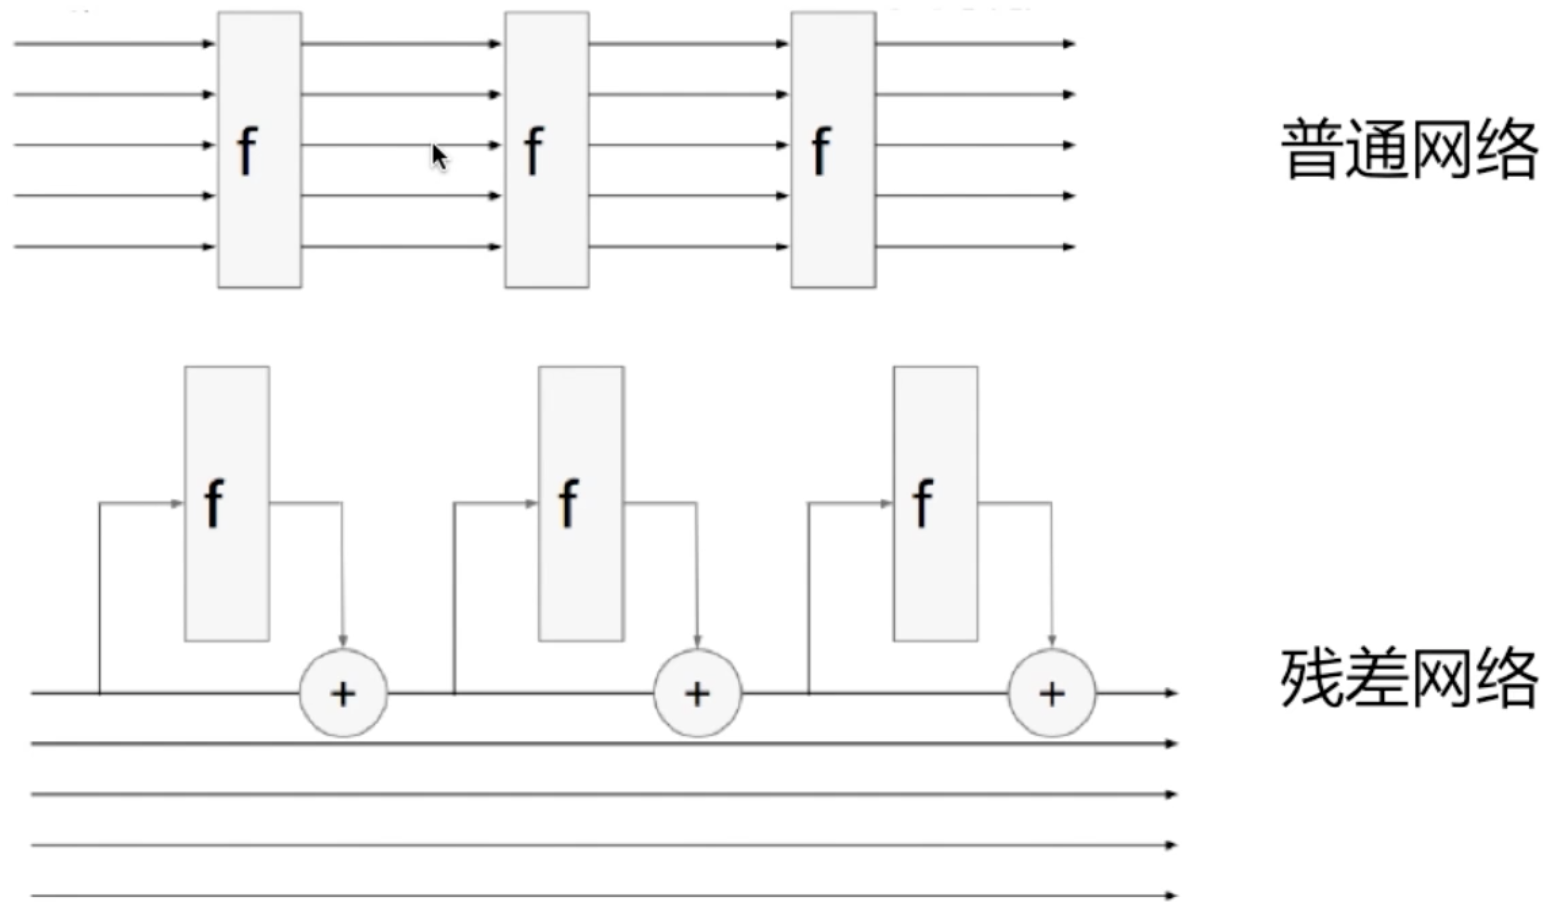

In [25]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/RNN+残差连接.png', width=350, height=350)

#### 双向网络
- 另一路以未来状态做为输入
- 可以学习上下文的信息
- 但是不可作为实时输出结果
- 两个状态拼接后进入输入层
- 进一步提高表达能力

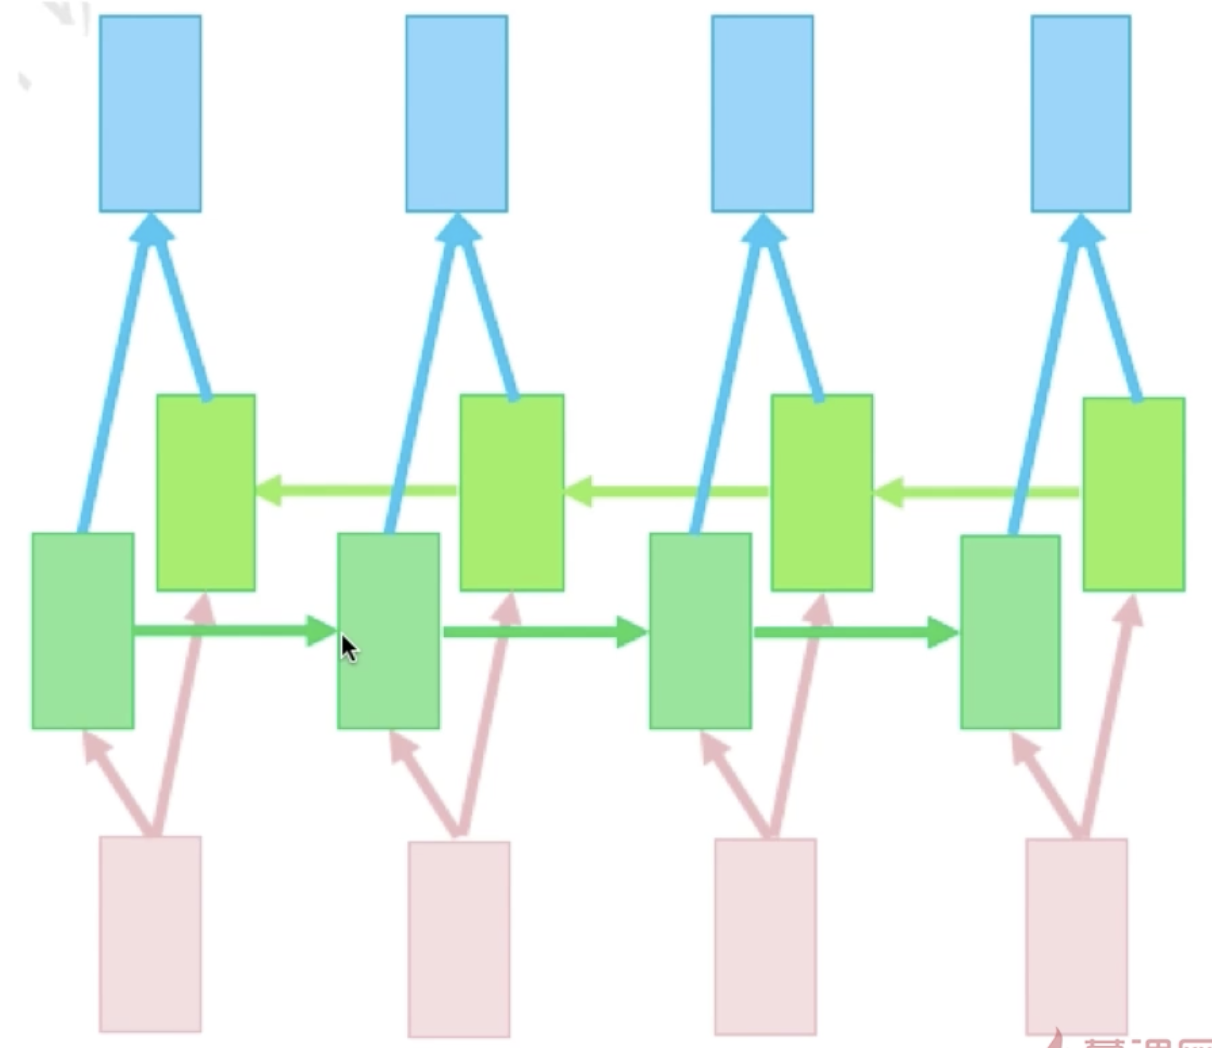

In [28]:
Image(filename = '/Users/xulipeng/Desktop/materials/深度学习/RNN/image/双向RNN.png', width=200, height=200)